In [29]:
#Phase 2 (State/UT wise analysis)
#Note :
#You need to be careful as this phase is whole state/ut wise analysis (not district-wise).
#It is up to you which columns you want to keep or delete to make proper analysis"

#2.1	Analysis of Literacy Rate vs Total Crimes.

#2.2	 Analysis of the type of crime vs each state vs Literacy rate.

#2.3	Analysis of year-on-year total crime rate.

#2.4	 Analysis of area vs overall crime

#2.5	 Analysis of Population vs overall Crime

#2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [31]:
data=pd.read_excel("Phase 2 Crime data.xlsx")

#data taken from https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_crime_rate and census 2011

In [32]:
data.head()

,States,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Crime Rate 2018,Crime Rate 2019,Crime Rate 2020,Crime Rate 2021,Population,Area(Km2),Literacy
0,Andhra Pradesh,144703.0,145751.0,238105,222199,278.1,278.6,452.7,420.4,84580777.0,275045.0,67.02
1,Arunachal Pradesh,2817.0,2877.0,2503,3039,188.7,190.9,164.5,197.7,1383727.0,83743.0,65.38
2,Assam,120572.0,132783.0,121609,133239,354.2,385.8,349.5,379.0,31205576.0,78438.0,72.19
3,Bihar,262815.0,269109.0,257512,282083,222.1,224.0,211.3,228.0,104099452.0,94163.0,61.80
4,Chhattisgarh,98233.0,96561.0,103173,110633,345.1,334.7,352.9,373.7,25545198.0,135192.0,70.28


In [33]:
data.shape

(36, 12)

In [34]:

data.describe()

,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Crime Rate 2018,Crime Rate 2019,Crime Rate 2020,Crime Rate 2021,Population,Area(Km2),Literacy
count,35.000000,35.000000,3.600000e+01,36.000000,34.000000,34.000000,36.000000,36.000000,3.400000e+01,34.000000,34.000000
mean,130703.828571,147319.085714,1.833690e+05,169341.944444,370.088235,378.055882,410.802778,375.913889,3.561634e+07,96690.264706,80.142059
std,168140.720532,179546.323404,2.841806e+05,222805.972719,303.498224,327.002366,406.485517,348.819626,4.470287e+07,104006.872590,17.014042
min,77.000000,182.000000,1.470000e+02,128.000000,83.200000,77.100000,51.300000,52.300000,6.447300e+04,30.000000,61.800000
25%,3832.500000,3950.500000,3.187000e+03,3156.750000,195.825000,201.275000,181.650000,188.050000,1.588534e+06,12009.250000,70.757500
50%,55664.000000,72855.000000,7.322250e+04,67173.000000,266.000000,270.000000,280.650000,258.250000,2.106970e+07,54578.000000,77.485000
75%,189646.000000,228579.000000,2.429568e+05,237170.000000,407.150000,390.675000,466.225000,389.350000,6.093140e+07,150578.250000,86.000000
max,585157.000000,628578.000000,1.377681e+06,756753.000000,1342.500000,1586.100000,1808.800000,1479.900000,1.998123e+08,342239.000000,163.340000


In [35]:
data.columns

Index(['States', 'Total Crimes 2018', 'Total Crimes 2019', 'Total Crimes 2020',
       'Total Crimes 2021', 'Crime Rate 2018', 'Crime Rate 2019',
       'Crime Rate 2020', 'Crime Rate 2021', 'Population', 'Area(Km2)',
       'Literacy'],
      dtype='object')

In [36]:
data.drop(['Crime Rate 2018', 'Crime Rate 2019', 'Crime Rate 2020', 'Crime Rate 2021', 'Area(Km2)', 'Literacy'], axis =1, inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   States             36 non-null     object 
 1   Total Crimes 2018  35 non-null     float64
 2   Total Crimes 2019  35 non-null     float64
 3   Total Crimes 2020  36 non-null     int64  
 4   Total Crimes 2021  36 non-null     int64  
 5   Population         34 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.8+ KB


In [37]:
data.fillna("0.0", inplace = True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States             36 non-null     object
 1   Total Crimes 2018  36 non-null     object
 2   Total Crimes 2019  36 non-null     object
 3   Total Crimes 2020  36 non-null     int64 
 4   Total Crimes 2021  36 non-null     int64 
 5   Population         36 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.8+ KB


In [39]:
data['Total Crimes 2018']=data['Total Crimes 2018'].astype(float)
data['Total Crimes 2019']=data['Total Crimes 2019'].astype(float)
data['Population']=data['Population'].astype(float)

In [40]:
data.head()

,States,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Population
0,Andhra Pradesh,144703.0,145751.0,238105,222199,84580777.0
1,Arunachal Pradesh,2817.0,2877.0,2503,3039,1383727.0
2,Assam,120572.0,132783.0,121609,133239,31205576.0
3,Bihar,262815.0,269109.0,257512,282083,104099452.0
4,Chhattisgarh,98233.0,96561.0,103173,110633,25545198.0


In [41]:
columns = data.columns[1:]
columns

Index(['Total Crimes 2018', 'Total Crimes 2019', 'Total Crimes 2020',
       'Total Crimes 2021', 'Population'],
      dtype='object')

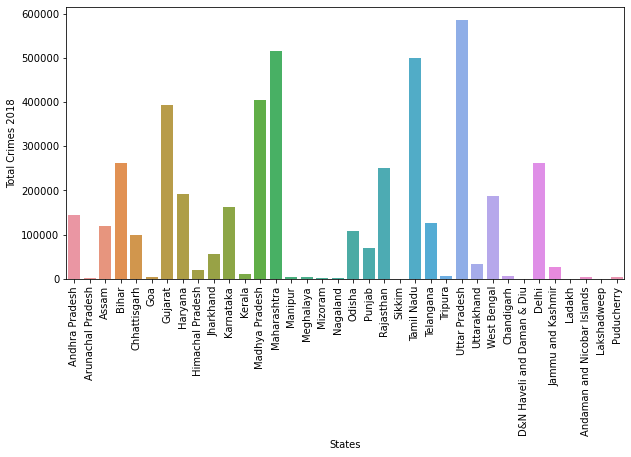

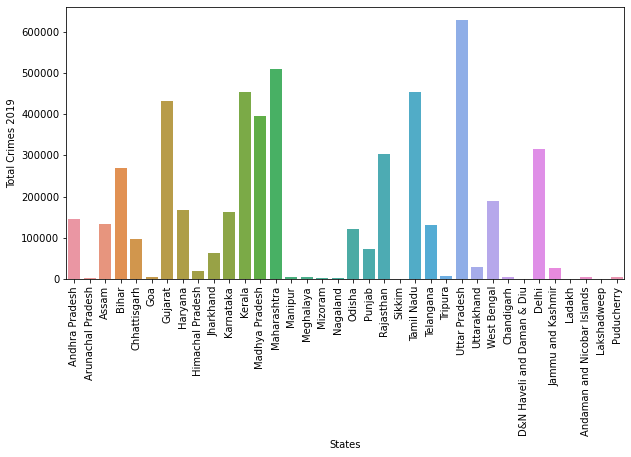

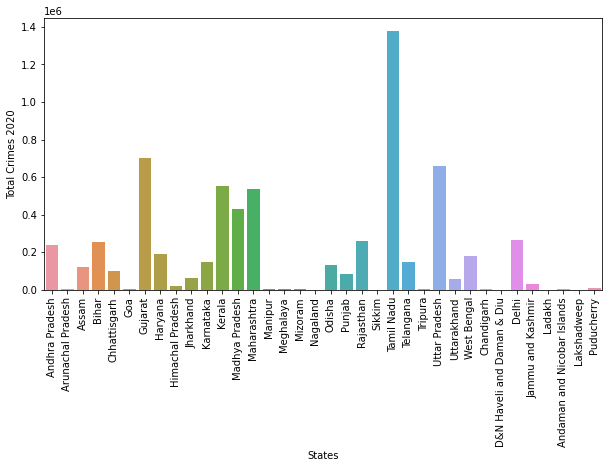

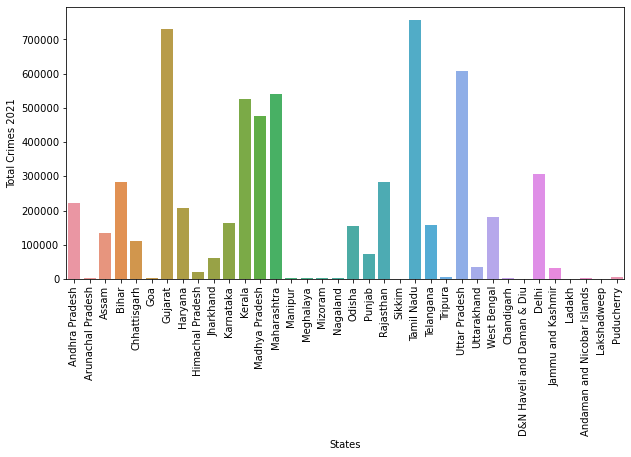

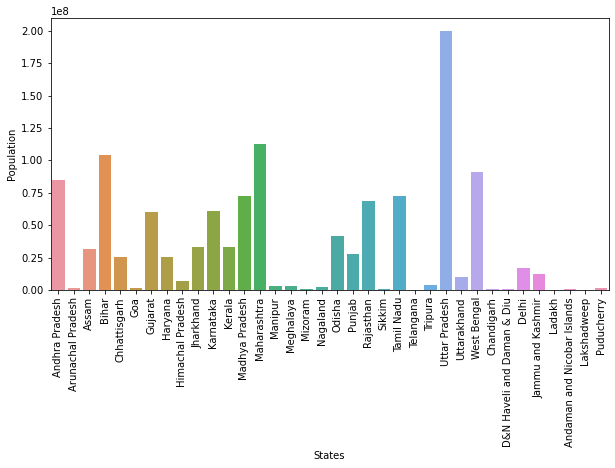

In [42]:
for i in columns:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='States',y=i, data=data)
    plt.xticks(rotation=90)
    plt.show()

In [43]:
df=pd.DataFrame({'State':data['States'], 'Total Crimes 2018':data['Total Crimes 2018'], 'Total Crimes 2019':data['Total Crimes 2019'], 'Total Crimes 2020':data['Total Crimes 2020'], 'Total Crimes 2021':data['Total Crimes 2021'], 'Population':data['Population']})
df_sorted_2018=df.sort_values('Total Crimes 2018', ascending=False)
df_sorted_2019=df.sort_values('Total Crimes 2019', ascending=False)
df_sorted_2020=df.sort_values('Total Crimes 2020', ascending=False)
df_sorted_2021=df.sort_values('Total Crimes 2021', ascending=False)
df_sorted_population=df.sort_values('Population', ascending=False)
df_sorted_population.head()   

,State,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Population
25,Uttar Pradesh,585157.0,628578.0,657925,608082,199812341.0
13,Maharashtra,515674.0,509443.0,539003,540800,112374333.0
3,Bihar,262815.0,269109.0,257512,282083,104099452.0
27,West Bengal,188063.0,188049.0,182367,181821,91276115.0
0,Andhra Pradesh,144703.0,145751.0,238105,222199,84580777.0


In [44]:
df_sorted_population.tail()

,State,Total Crimes 2018,Total Crimes 2019,Total Crimes 2020,Total Crimes 2021,Population
21,Sikkim,869.0,821.0,675,728,610577.0
33,Andaman and Nicobar Islands,3699.0,4034.0,2542,1332,380581.0
34,Lakshadweep,77.0,182.0,147,128,64473.0
32,Ladakh,0.0,0.0,403,559,0.0
23,Telangana,126858.0,131254.0,147504,158809,0.0


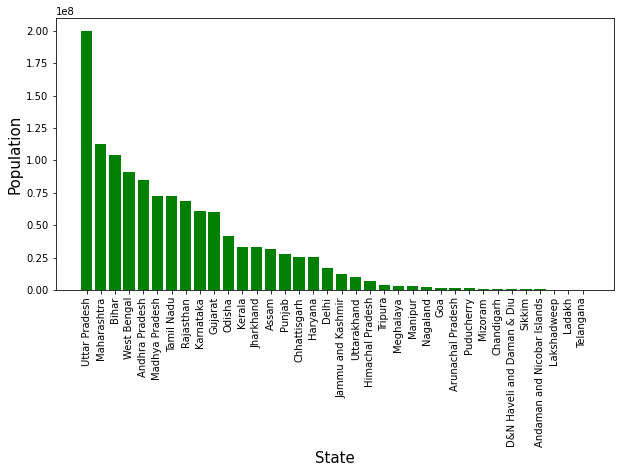

In [45]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Population', data=df_sorted_population, color='green')
plt.xlabel("State", size=15)
plt.ylabel("Population", size=15)
plt.xticks(rotation=90)
plt.show()

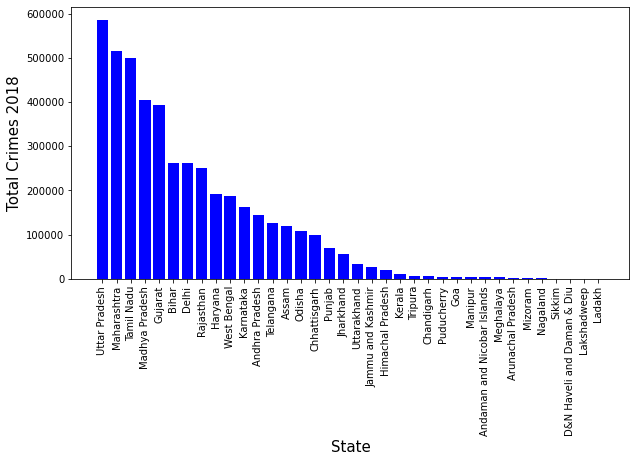

In [46]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Total Crimes 2018', data=df_sorted_2018, color='blue')
plt.xlabel("State", size=15)
plt.ylabel("Total Crimes 2018", size=15)
plt.xticks(rotation=90)
plt.show()

In [47]:
#from the above graph we observed that UP, Maharashtra, TN, MP and Gujarat were ammong the states with maximum number of crimes and lakshadweep, sikkim, D&N Haveli and Daman & Diu are among the safest places with minimum crimes commited for the year.


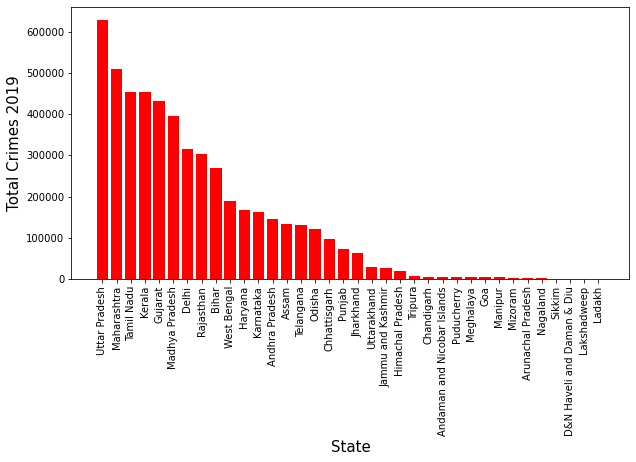

In [48]:
plt.figure(figsize=(10,5))
plt.bar('State', 'Total Crimes 2019', data=df_sorted_2019, color='red')
plt.xlabel("State", size=15)
plt.ylabel("Total Crimes 2019", size=15)
plt.xticks(rotation=90)
plt.show()

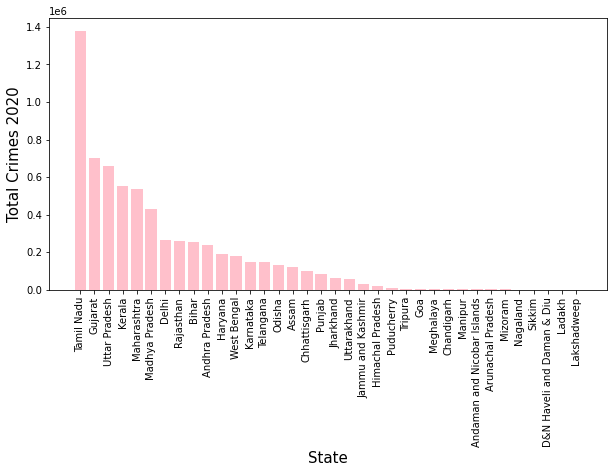

In [49]:
# The crime in Kerala has increased a lot in comparison with year 2018 and its among the top 5 states with maximum number of crimes along with Uttar Pradesh, Maharashtra, Tamil Nadu, Gujarat.  
plt.figure(figsize=(10,5))
plt.bar('State', 'Total Crimes 2020', data=df_sorted_2020, color='pink')
plt.xlabel("State", size=15)
plt.ylabel("Total Crimes 2020", size=15)
plt.xticks(rotation=90)
plt.show()

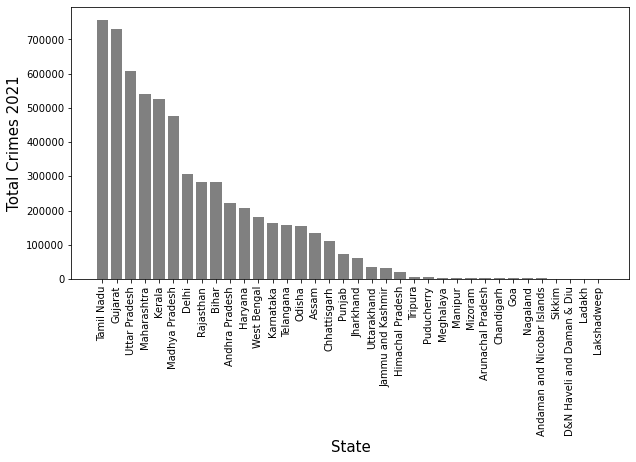

In [50]:
#Crimes in TN and gujarat have increased and they are now among the tops stated wrt to the number of crimes.
plt.figure(figsize=(10,5))
plt.bar('State', 'Total Crimes 2021', data=df_sorted_2021, color='grey')
plt.xlabel("State", size=15)
plt.ylabel("Total Crimes 2021", size=15)
plt.xticks(rotation=90)
plt.show()

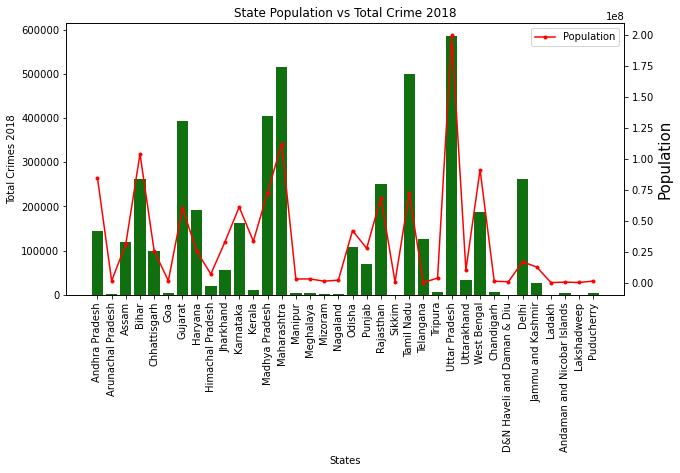

In [51]:
#Tamil Nadu, Gujarat, Uttar Pradesh, Maharashtra, Kerala are among the states with max number of crimes committed in the year 2021
plt.figure(figsize=(10,5))
sns.barplot('States', 'Total Crimes 2018', color ='green', data=data)
plt.xticks(rotation =90)
ax2 = plt.twinx()
plt.plot('States', 'Population', data=data, marker='.', color='red', label='Population')
plt.xlabel('States', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('State Population vs Total Crime 2018')
plt.legend()
plt.show()

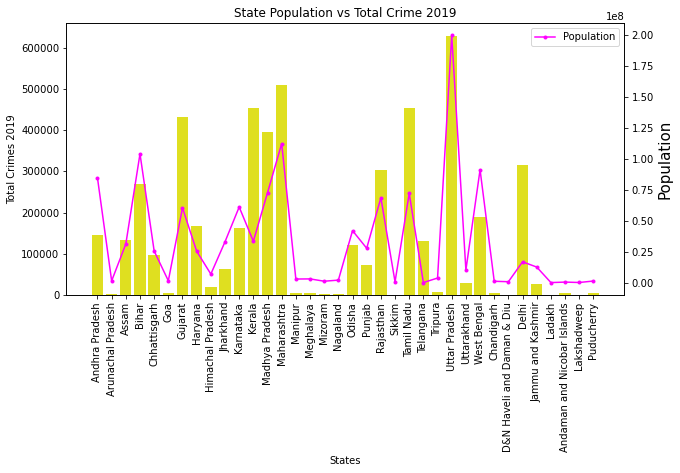

In [52]:
plt.figure(figsize=(10,5))
sns.barplot('States', 'Total Crimes 2019', color ='yellow', data=data)
plt.xticks(rotation =90)
ax2 = plt.twinx()
plt.plot('States', 'Population', data=data, marker='.', color='magenta', label='Population')
plt.xlabel('States', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('State Population vs Total Crime 2019')
plt.legend()
plt.show()

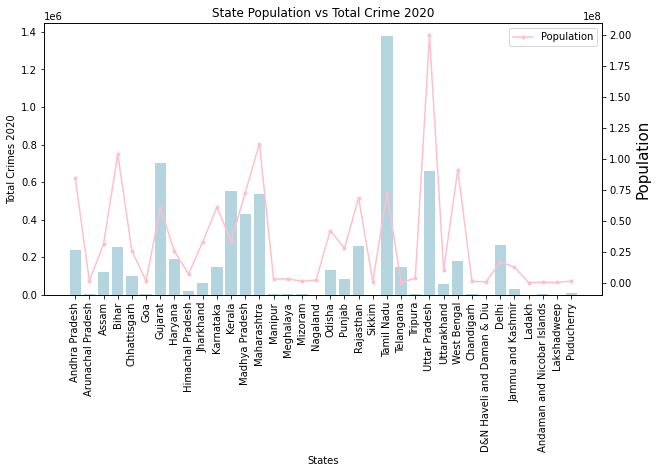

In [53]:
plt.figure(figsize=(10,5))
sns.barplot('States', 'Total Crimes 2020', color ='lightblue', data=data)
plt.xticks(rotation =90)
ax2 = plt.twinx()
plt.plot('States', 'Population', data=data, marker='.', color='pink', label='Population')
plt.xlabel('States', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('State Population vs Total Crime 2020')
plt.legend()
plt.show()

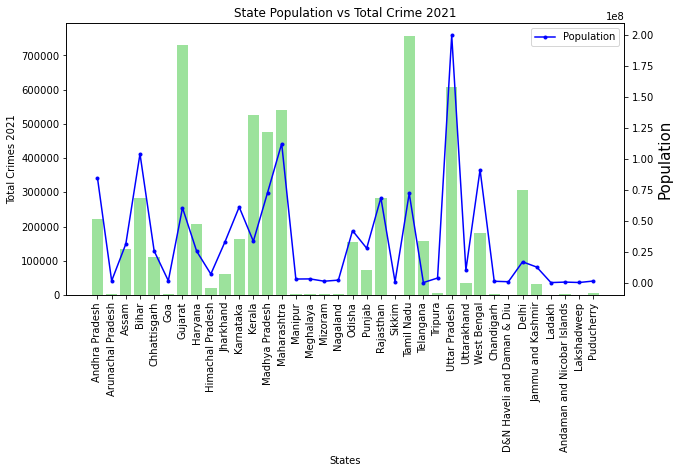

In [54]:
plt.figure(figsize=(10,5))
sns.barplot('States', 'Total Crimes 2021', color ='lightgreen', data=data)
plt.xticks(rotation =90)
ax2 = plt.twinx()
plt.plot('States', 'Population', data=data, marker='.', color='blue', label='Population')
plt.xlabel('States', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('State Population vs Total Crime 2021')
plt.legend()
plt.show()

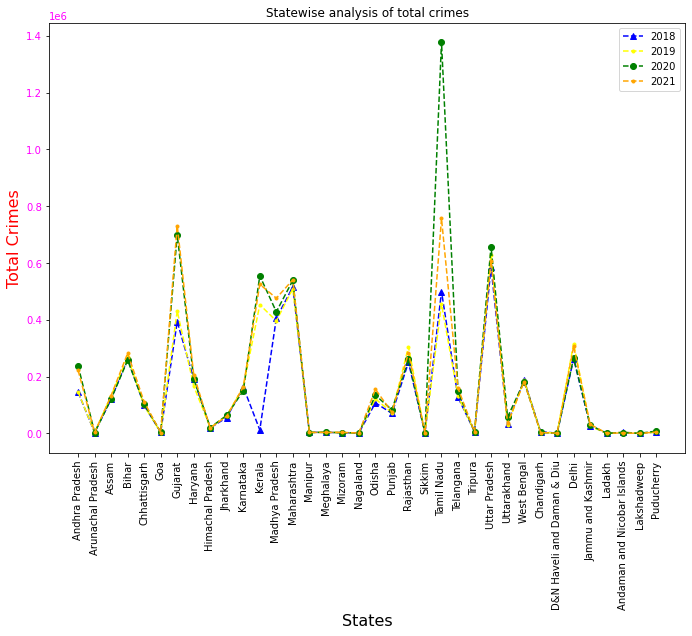

In [55]:
plt.figure(figsize=(10,7))
plt.plot(data['States'], data['Total Crimes 2018'],color='blue',marker='^',ls='--', label='2018')
plt.plot(data['States'], data['Total Crimes 2019'],color='yellow',marker='.',ls='--', label='2019')
plt.plot(data['States'], data['Total Crimes 2020'],color='green',marker='o',ls='--', label='2020')
plt.plot(data['States'], data['Total Crimes 2021'],color='orange',marker='.',ls='--', label='2021')
plt.tick_params(axis='y', labelcolor='magenta')
plt.title('Statewise analysis of total crimes')
plt.xlabel('States', fontsize=16)
plt.ylabel('Total Crimes', fontsize = 16,  color='red')
plt.tight_layout()
plt.xticks(rotation=90)
plt.legend()
plt.show()

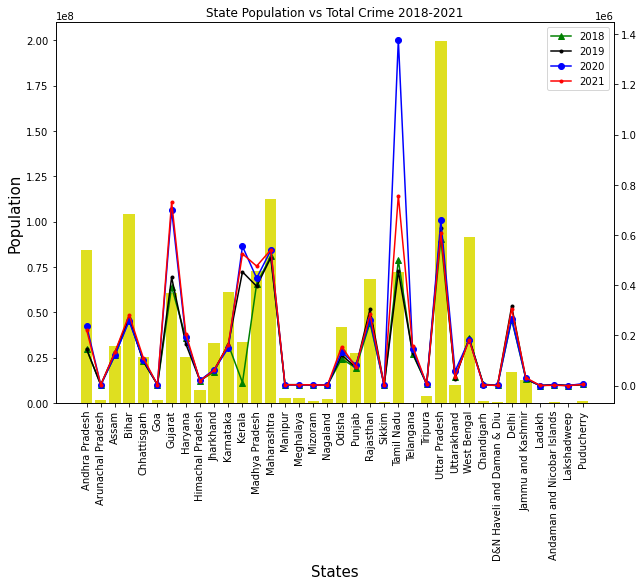

In [56]:
plt.figure(figsize=(10,7))
sns.barplot('States', 'Population', color='yellow', data=data)
plt.xlabel('States', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.xticks(rotation =90)
ax2 = plt.twinx()
plt.plot('States', 'Total Crimes 2018', color ='green', data=data, marker='^', label='2018')
plt.plot('States', 'Total Crimes 2019', color ='black', data=data, marker='.', label='2019')
plt.plot('States', 'Total Crimes 2020', color ='blue', data=data, marker='o', label='2020')
plt.plot('States', 'Total Crimes 2021', color ='red', data=data, marker='.', label='2021')
plt.title('State Population vs Total Crime 2018-2021')
plt.legend()
plt.show()

In [58]:
#UP has the maximum population and the total crimes comitted is also among highest over the period.
#Tamil Nadu has higher number of crimes comitted as compared with the population data. Population is not very hight but the crimes committed is at top.
#Gujarat has considerable higher crimes rate wrt to the population and so is with Kerala, Goa, himachal Pradesh and Delhi.
#Andhra Pradesh, Bihar, Karnataka, West Bengal are among the states with less crime wrt the population. 